## 1) Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2) Read in and Explore the Data

In [3]:
#import train and test CSV files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#take a look at the training data
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Asim, Mr. Adola",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Student


## 3) Data Analysis

In [4]:
#get a list of the features within the dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
#see a sample of the dataset to get an idea of the variables
train.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
492,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.500,C30,S
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.775,NaN,S
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.050,NaN,S


In [6]:
#see a summary of the training dataset
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Asim, Mr. Adola",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Some Observations:
1. There are a total of 891 passengers in our training set.
2. The Age feature is missing approximately 19.8% of its values.
3. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.
4. The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.
5. The Embarked feature is missing 0.22% of its values, which should be relatively harmless

In [7]:
#check for any other unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 4) Data Visualization 

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


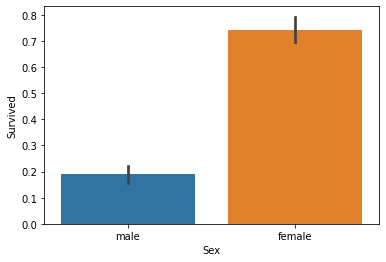

In [8]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


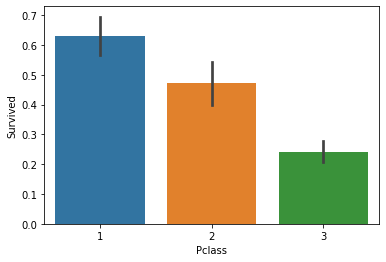

In [9]:
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


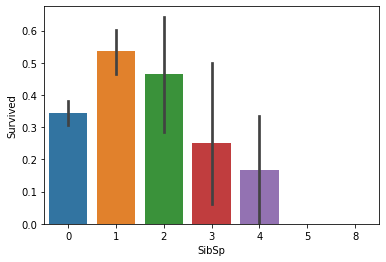

In [10]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)# 

## Parch features

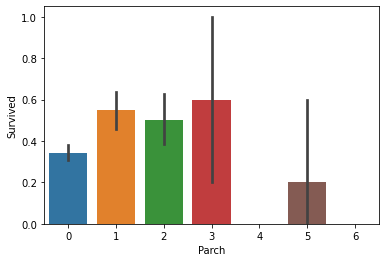

In [11]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

# Age 

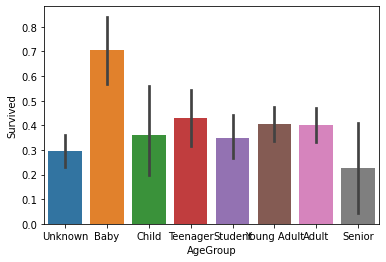

In [13]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

In [18]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Young Adult,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Student,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,W./C. 6607,23.4500,NaN,S,Unknown,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young Adult,1


## Cabin features

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


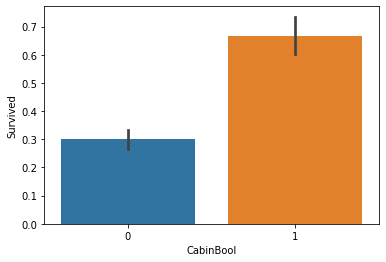

In [16]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

## 5) Cleaning data

In [19]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Rosblom, Miss. Salli Helena",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


1. We have a total of 418 passengers.
1. value from the Fare feature is missing.
2. Around 20.5% of the Age feature is missing, we will need to fill that in.

## Cabin features

In [20]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

## Ticket

In [21]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

## Embarked Feature

In [22]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [23]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

# Age Feature
Next we'll fill in the missing values in the Age feature. Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value (as we did with Embarked). Instead, let's try to find a way to predict the missing ages.

In [24]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [26]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [28]:
 #fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I tried to get this code to work with using .map(), but couldn't.
#I've put down a less elegant, temporary solution for now.
#train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
#test = test.fillna({"Age": test["Title"].map(age_title_mapping)})

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

 Now that we've filled in the missing values at least somewhat accurately (I will work on a better way for predicting missing age values), it's time to map each age group to a numerical value.

In [29]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

# Name Feature
We can drop the name feature now that we've extracted the titles.

In [30]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

# Sex Feature¶

In [31]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


# Embarked Feature

In [32]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


# Fare Feature
It's time separate the fare values into some logical groups as well as filling in the single missing value in the test dataset

In [33]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [34]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2
5,6,0,3,0,0,0,3,5.0,0,1,2
6,7,0,1,0,0,0,1,6.0,1,1,4
7,8,0,3,0,3,1,1,1.0,0,4,3
8,9,1,3,1,0,2,1,5.0,0,3,2
9,10,1,2,1,1,0,2,3.0,0,3,3


In [35]:
test.head(10)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2
5,897,3,0,0,0,1,3.0,0,1,2
6,898,3,1,0,0,3,5.0,0,2,1
7,899,2,0,1,1,1,5.0,0,1,3
8,900,3,1,0,0,2,3.0,0,3,1
9,901,3,0,2,0,1,4.0,0,1,3


# 6)Selecting Best Models

# Splitting the Training Data
We will use part of our training data (22% in this case) to test the accuracy of our different models.

In [36]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

# Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


# Desicion Tree Classifier

In [38]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

79.7


# Random Forest Classifier

In [39]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)


84.77


# KNN

In [41]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

77.66


# Comparing the different accuracy of different models.

In [43]:
models = pd.DataFrame({
    'Model': [ 'KNN', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [ acc_knn, 
              acc_randomforest, acc_gaussian, acc_decisiontree,]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,84.77
3,Decision Tree,79.70
2,Naive Bayes,78.68
0,KNN,77.66
